# Project Proposal - Rain in Australia

## Introduction

The weather, and its subsequent reports appear frequently in our everyday lives. Since we cannot collect data from the future, weather predictions are based heavily on estimates and assumptions from current and past data. This often involves analyzing combinations of certain variables such as temperature, wind, humidity, etc… We will be exploring the models that make predicting changes in weather patterns for specific times and locations possible. We thus formulated the question: <b> will it rain tomorrow based on the current state of the weather and past weather data? </b> The dataset we will be analyzing, titled ‘Rain in Australia,’ summarizes different aspects of the weather for a decade recorded by various weather stations situated in Australia. These include records of the daily minimum and maximum temperatures, evaporation, hours of sunshines, pressure, humidity, etc…

In [4]:
# load necessary packages
library(tidyverse)
library(tidymodels)

# load data
url <- "https://drive.google.com/uc?export=download&id=1NKrFCoyZc8R1XoZ3Maz5AtSg5W4b2n9j"
rain <- read_csv(url)
rain

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NA,NA,W,50,SW,⋯,49,19,1009.6,1008.2,1,NA,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NA,NA,W,35,SSE,⋯,48,19,1013.4,1010.1,NA,NA,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NA,NA,NNW,80,SE,⋯,42,9,1008.9,1003.6,NA,NA,18.3,30.2,No,Yes


The last column of our dataset is the target variable, with 'Yes' indicating that it will rain tomorrow and 'No' indicating that it will not rain tomorrow. We can see that RainTomorrow is of type character. Since we will be working with RainTomorrow as a categorical statistical variable, we will convert it to a factor using the function as_factor.

In [5]:
# convert the character Class variable to the factor datatype
rain <- rain |>
  mutate(RainTomorrow = as_factor(RainTomorrow))
rain

Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NA,NA,W,50,SW,⋯,49,19,1009.6,1008.2,1,NA,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NA,NA,W,35,SSE,⋯,48,19,1013.4,1010.1,NA,NA,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NA,NA,NNW,80,SE,⋯,42,9,1008.9,1003.6,NA,NA,18.3,30.2,No,Yes


We focus on one weather station, due to the possibility of drastic discrepencies between recorded data for different weather stations, as the entirety of Australia is too large of a region to analyze for rainfall. To do this, we filter for a singular location. For this project, we will use Albury.

In [6]:
rain_albury <- rain |>
  filter(Location == "Albury") 
rain_albury

Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NA,NA,W,50,SW,⋯,49,19,1009.6,1008.2,1,NA,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NA,NA,W,35,SSE,⋯,48,19,1013.4,1010.1,NA,NA,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NA,NA,NNW,80,SE,⋯,42,9,1008.9,1003.6,NA,NA,18.3,30.2,No,Yes


## Preliminary Exploratory Data Analysis

We split our dataset so that 75% of our original data set ends up in the training set. The training set is used to fit the model parameters, and the test set evaluates the best model. 

In [7]:
# set the seed
set.seed(1)

# split the data into a training and testing set
rain_split <- initial_split(rain_albury, prop = 0.75, strata = RainTomorrow)
rain_train <- training(rain_split)
rain_test <- testing(rain_split)

!!! "Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. "

Warning message:
“Removed 5 rows containing missing values (geom_point).”


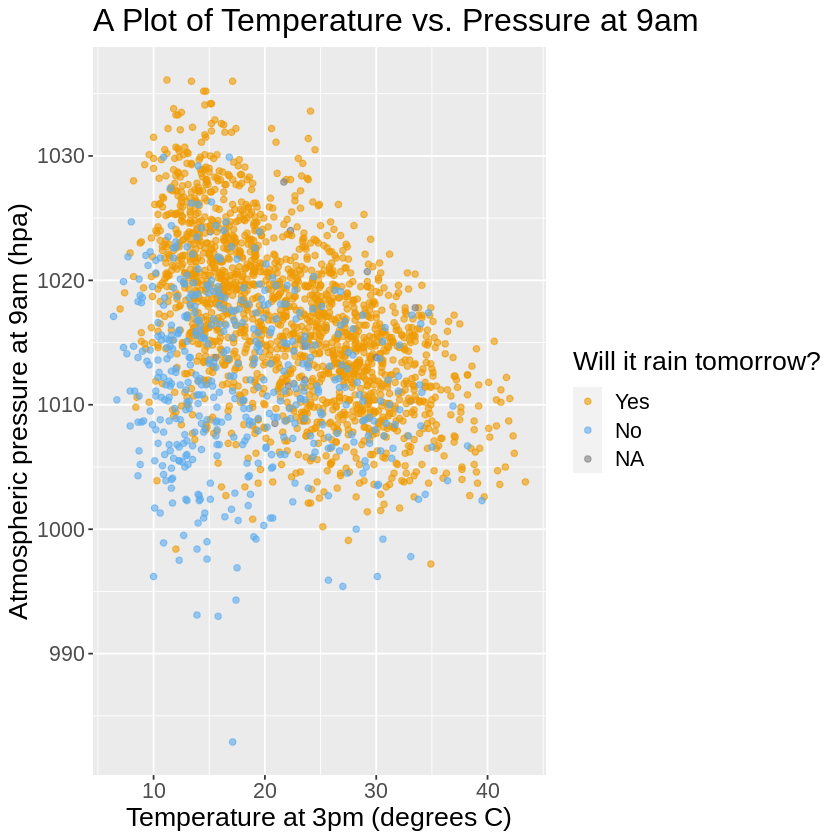

In [8]:
# create scatter plot of temperature versus pressure,
# labeling the points be rain tomorrow class
rain_prelim <- rain_train |>
  ggplot(aes(x = Temp3pm, y = Pressure3pm, color = RainTomorrow)) +
  geom_point(alpha = 0.6) +
  labs(x = "Temperature at 3pm (degrees C)", 
       y = "Atmospheric pressure at 9am (hpa)",
       color = "Will it rain tomorrow?") +
  scale_color_manual(labels = c("Yes", "No"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 16)) +
  ggtitle("A Plot of Temperature vs. Pressure at 9am")
rain_prelim

We can see that positive next-day rain observations typically fall in the upper right-hand corner of the plot area. By contrast, negative next-day rain observations typically fall in the lower left-hand corner of the plot. In other words, at lower temperature and atmospheric pressure, there tends to be no rain the next day, whereas there tends to be next-day rain for larger values. Based on our visualization, it seems like the prediction of pressure and temperature are appropriate predictor variables to select.

## Methods

To conduct our data analysis, we select the columns that are most influential for the prediction of next-day rainfall. We will be using K-nearest neighbors classification to predict whether it will rain the next day using the following predictors: rainfall recorded for the day, wind gust direction, humidity, temperature, and pressure. These variables are selected by process of external research on what factors increase the chance of rain the most as well as exploratory data analysis (like above) to discern any existing correlations. One way we can visualize the results of our analysis is by generating a plot of the predicted next day rainfall versus a specific data column, such as humidity. We may create one such plot for each predictor variable and visualize them side by side, to compare which predictors are most strongly associated with the target variable.

## Expected Outcomes and Significance

In our outcomes, we expect to find the predicted classification (yes or no) for next-day rain. Despite its seeming trivialness, weather predictions are critical for countless activities, businesses, and individuals. On a more serious scale, weather forecasts are used to protect life and safety (eg. should a aircraft depart?). Economically, weatther predictions  protect economic prosperity for sectors such as utility, as electricity and gas companies can predict how strongly the demand is affected by weather. On a more mundane scale, weather predictions can simply inform us whether we should bring an umbrella for our daily schedules. Some future questions we may ask ourselves are: how can we improve the accuracy of the weather prediction model? Does the time of day during which the data is recorded affect prediction accuracy?

Group members:
Amy Xiong